In [ ]:
!pip install ultralytics easyocr opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 


image 1/1 /content/resized_image.jpg: 640x640 1 license_plate, 7.4ms
Speed: 5.9ms preprocess, 7.4ms inference, 407.2ms postprocess per image at shape (1, 3, 640, 640)


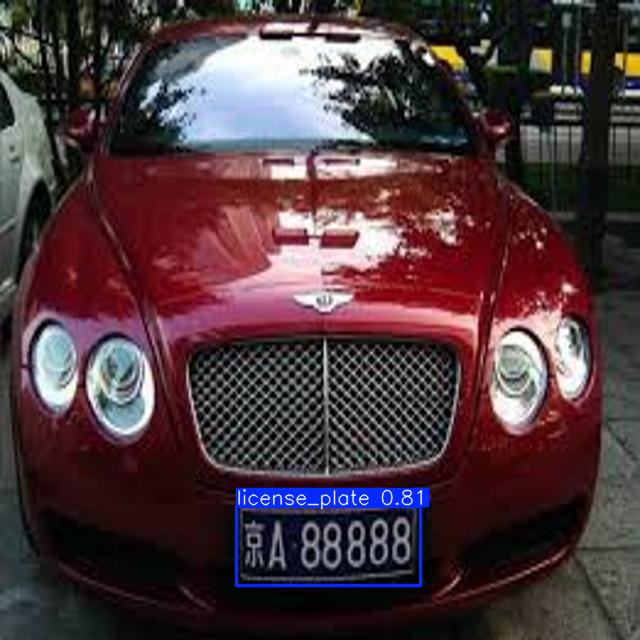

Boxes: tensor([[236.0228, 506.0965, 420.4656, 585.1178]], device='cuda:0')
Confidences: tensor([0.8056], device='cuda:0')
Labels: ['license_plate']


In [ ]:
from PIL import Image
from ultralytics import YOLO

model = YOLO("/content/best.pt")

# Load and resize the image
image_path = "/content/images-chinese.jpeg"
resized_image_path = "resized_image.jpg"

img = Image.open(image_path)
img = img.resize((640, 640))  # Resize to 640x640
img.save(resized_image_path)

# Run inference again with the resized image
results = model(resized_image_path, conf=0.25)

# Show results
results[0].show()

# Extract boxes and confidences
boxes = results[0].boxes
confidences = boxes.conf if boxes else []
labels = [results[0].names[int(cls)] for cls in boxes.cls] if boxes else []

print("Boxes:", boxes.xyxy if boxes else [])
print("Confidences:", confidences)
print("Labels:", labels)



image 1/1 /content/resized_image.jpg: 640x640 1 license_plate, 8.2ms
Speed: 2.1ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


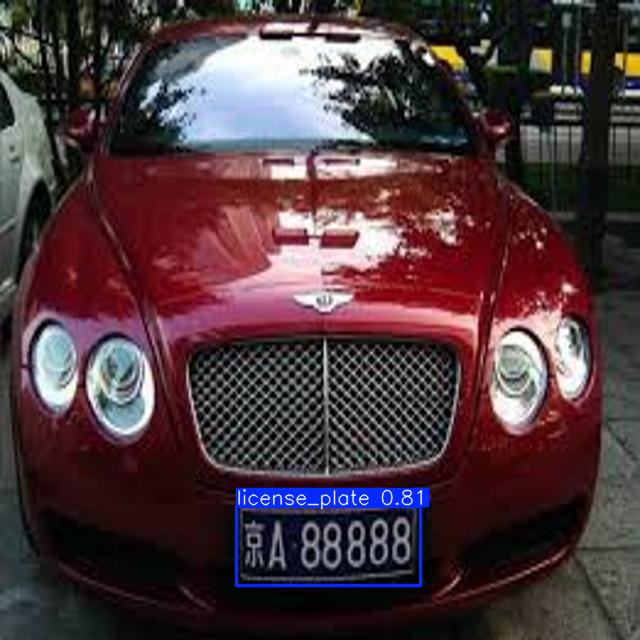

Boxes: [[     236.02       506.1      420.47      585.12]]
Confidences: [    0.80561]
Labels: ['license_plate']


Progress: |██████████████████████████████████████████████████| 100.0% Complete[INFO] Cropped plate saved as cropped_plate_1.jpg
[DETECTED] License Plate Text 1: 京88888


In [ ]:
from PIL import Image
import cv2
import torch
import easyocr
from ultralytics import YOLO

# Step 1: Load the YOLO model
model = YOLO("/content/best.pt")

# Step 2: Load and resize the image
image_path = "/content/images-chinese.jpeg"
resized_image_path = "resized_image.jpg"

img = Image.open(image_path)
img = img.resize((640, 640))  # Resize to 640x640
img.save(resized_image_path)

# Step 3: Run inference
results = model(resized_image_path, conf=0.25)

# Optional: show results
results[0].show()

# Step 4: Extract bounding boxes, confidences, labels
boxes = results[0].boxes
if boxes:
    xyxy = boxes.xyxy.cpu().numpy()
    confidences = boxes.conf.cpu().numpy()
    labels = [results[0].names[int(cls)] for cls in boxes.cls]
    print("Boxes:", xyxy)
    print("Confidences:", confidences)
    print("Labels:", labels)
else:
    print("No detections found.")
    xyxy = []

# Step 5: Crop detected plates and run EasyOCR
img_cv2 = cv2.imread(resized_image_path)
reader = easyocr.Reader(['en', 'ch_sim'])

for i, box in enumerate(xyxy):
    x1, y1, x2, y2 = map(int, box)
    cropped_plate = img_cv2[y1:y2, x1:x2]

    cropped_path = f"cropped_plate_{i+1}.jpg"
    cv2.imwrite(cropped_path, cropped_plate)
    print(f"[INFO] Cropped plate saved as {cropped_path}")

    result = reader.readtext(cropped_plate)

    if result:
        detected_text = result[0][1]
        print(f"[DETECTED] License Plate Text {i+1}: {detected_text}")
    else:
        print(f"[WARNING] No text detected in plate {i+1}")


image 1/1 /content/resized_image.jpg: 640x640 1 license_plate, 8.5ms
Speed: 2.3ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

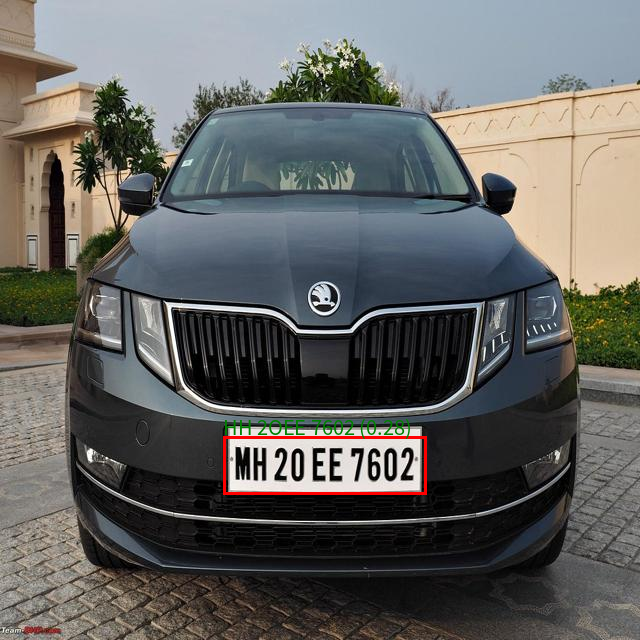

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import cv2
import torch
from ultralytics import YOLO
import easyocr
import numpy as np

# Load YOLO model
model = YOLO('/content/best.pt')  # Your custom-trained YOLOv8 model

# Resize image to 640x640
image_path = "/content/image1.jpg"
resized_image_path = "resized_image.jpg"
img = Image.open(image_path).resize((640, 640))
img.save(resized_image_path)

# Perform detection
results = model(resized_image_path, conf=0.25)
boxes = results[0].boxes  # Detected bounding boxes

# Convert image to OpenCV format for cropping
img_cv2 = cv2.imread(resized_image_path)

# Convert image to PIL format for drawing
img_pil = Image.fromarray(cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB))
draw = ImageDraw.Draw(img_pil)

# # Load a font that supports both English and Chinese
# font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"
# font = ImageFont.truetype(font_path, 20)

# Initialize EasyOCR with English and Simplified Chinese
reader = easyocr.Reader(['en'])

# Loop over detected boxes
if boxes is not None and len(boxes) > 0:
    for box in boxes:
        xyxy = box.xyxy[0].cpu().numpy().astype(int)
        x1, y1, x2, y2 = xyxy
        confidence = box.conf[0].item()

        # Crop detected license plate
        cropped = img_cv2[y1:y2, x1:x2]

        # Use EasyOCR to extract text
        result = reader.readtext(cropped)
        extracted_text = result[0][1] if result else "Text Not Found"

        # Draw bounding box
        draw.rectangle([x1, y1, x2, y2], outline="red", width=3)

        # Draw OCR text and confidence
        label = f"{extracted_text} ({confidence:.2f})"
        draw.text((x1, y1 - 25), label, fill="green", font=font)
else:
    print("No license plate detected.")

# Convert back to OpenCV format for display
final_img = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)

# Display in Colab
from google.colab.patches import cv2_imshow
cv2_imshow(final_img)

In [ ]:
!apt-get update -qq
!apt-get install -y fonts-noto-cjk

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 100 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Fetched 61.2 MB in 2s (34.6 MB/s)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-

In [ ]:
!fc-list | grep "NotoSansCJK"

/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc: Noto Sans CJK JP:style=Regular
/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc: Noto Sans CJK HK:style=Regular
/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc: Noto Sans CJK KR:style=Regular
/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc: Noto Sans CJK SC:style=Regular
/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc: Noto Sans CJK TC:style=Regular
/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc: Noto Sans Mono CJK TC:style=Bold
/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc: Noto Sans Mono CJK SC:style=Bold
/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc: Noto Sans Mono CJK KR:style=Bold
/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc: Noto Sans Mono CJK HK:style=Bold
/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc: Noto Sans Mono CJK JP:style=Bold
/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc: Noto Sans Mono CJK SC:style=Regular
/usr/share/fonts/opentype/noto/NotoSansCJK-

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import cv2
import numpy as np
from ultralytics import YOLO
import easyocr

# # Install Chinese font
# font_path = "/usr/share/fonts/truetype/arphic/uming.ttc"
# font = ImageFont.truetype(font_path, 22)

# Load YOLOv8 model
model = YOLO('/content/best.pt')  # Replace with your model path

# Initialize EasyOCR
reader = easyocr.Reader(['en'])

# Load video
input_path = "/content/video2.mp4"  # Replace with your input video
cap = cv2.VideoCapture(input_path)

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Create VideoWriter to save output
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_path = "/content/output2.mp4"
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

frame_index = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Resize for YOLO input
    resized_frame = cv2.resize(frame, (640, 640))

    # Run YOLO detection
    results = model(resized_frame, conf=0.25)
    boxes = results[0].boxes

    # Convert back to original size for drawing
    scale_x = width / 640
    scale_y = height / 640

    # Convert to PIL for text rendering
    pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(pil_image)

    if boxes is not None and len(boxes) > 0:
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
            conf = box.conf[0].item()

            # Rescale box
            x1, y1, x2, y2 = int(x1 * scale_x), int(y1 * scale_y), int(x2 * scale_x), int(y2 * scale_y)

            # Crop region
            cropped = frame[y1:y2, x1:x2]
            result = reader.readtext(cropped, detail=1, paragraph=True)
            extracted_text = " ".join([r[1] for r in result]) if result else "Text Not Found"

            # Draw box and text
            draw.rectangle([x1, y1, x2, y2], outline="red", width=2)
            draw.text((x1, y1 - 25), f"{extracted_text} ({conf:.2f})", fill=(0, 255, 0), font=font)

    # Convert back to OpenCV format
    output_frame = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)
    out.write(output_frame)

    frame_index += 1

cap.release()
out.release()

print("✅ Video processing complete. Saved to:", output_path)


0: 640x640 1 license_plate, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 license_plate, 7.3ms
Speed: 2.3ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 license_plate, 8.0ms
Speed: 3.7ms preprocess, 8.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 license_plate, 7.4ms
Speed: 2.2ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 license_plate, 7.4ms
Speed: 2.1ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 license_plate, 8.1ms
Speed: 3.4ms preprocess, 8.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 license_plate, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 license_plate, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.2ms 